In [1]:
import pandas as pd

# Load the merged CSV file
file_path = r'C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sentence\CSV\Government\Gov_Death_Sentence.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()


,文件名,索引号,主题分类,发文机关,成文日期,发布日期,发文字号,标题,来源,公文种类,...,Unnamed: 1994,Unnamed: 1995,Unnamed: 1996,Unnamed: 1997,Unnamed: 1998,Unnamed: 1999,Unnamed: 2000,Unnamed: 2001,Unnamed: 2002,Unnamed: 2003
0,35年马拉松诉讼终划句号：无罪.docx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,中国青年报,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,“百香果女孩被害案”死刑复核裁定书亮点解读.docx,NaN,NaN,NaN,NaN,4/7/2021,NaN,NaN,人民法院报,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,《牧人与屠夫》影评：死刑存废注定无法达成共识.docx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,中国新闻周刊,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,《礼记》“血亲复仇”理念对古代法制的影响.docx,NaN,NaN,NaN,NaN,1/3/2024,NaN,NaN,法治日报-法治网,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,何泽华一审被判死缓.docx,NaN,NaN,NaN,NaN,5/29/2024,NaN,NaN,法治日报-法治网,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df = df.drop_duplicates()

# Display the shape of the DataFrame before and after removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)
print("Shape of DataFrame after removing duplicates:", df.drop_duplicates().shape)

Shape of DataFrame before removing duplicates: (27, 2004)
Shape of DataFrame after removing duplicates: (27, 2004)


In [3]:
# Convert text to lowercase(Not necessary but just in case some answers are in English or French and etc.)
df['内容'] = df['内容'].str.lower()

# Remove special characters and HTML tags
df['内容'] = df['内容'].str.replace(r'<[^>]+>', '')  # Remove HTML tags
df['内容'] = df['内容'].str.replace(r'[^a-zA-Z0-9\u4e00-\u9fa5\s]', '')  # Remove special characters except Chinese characters, alphanumeric characters, and whitespace

# Display the cleaned DataFrame
df.head()

,文件名,索引号,主题分类,发文机关,成文日期,发布日期,发文字号,标题,来源,公文种类,...,Unnamed: 1994,Unnamed: 1995,Unnamed: 1996,Unnamed: 1997,Unnamed: 1998,Unnamed: 1999,Unnamed: 2000,Unnamed: 2001,Unnamed: 2002,Unnamed: 2003
0,35年马拉松诉讼终划句号：无罪.docx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,中国青年报,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,“百香果女孩被害案”死刑复核裁定书亮点解读.docx,NaN,NaN,NaN,NaN,4/7/2021,NaN,NaN,人民法院报,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,《牧人与屠夫》影评：死刑存废注定无法达成共识.docx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,中国新闻周刊,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,《礼记》“血亲复仇”理念对古代法制的影响.docx,NaN,NaN,NaN,NaN,1/3/2024,NaN,NaN,法治日报-法治网,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,何泽华一审被判死缓.docx,NaN,NaN,NaN,NaN,5/29/2024,NaN,NaN,法治日报-法治网,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import re
import jieba
import pandas as pd

# Define a list of stop words
stop_words = set([
    "$", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "?", "_", "“", "”", "、",
    "。", "《", "》", "一", "一些", "一何", "一切", "一则", "一方面", "一旦", "一个", "一来", "一样", "一般", "一转眼", "月",
    "万一", "两", "两个", "俩", "上", "中", "上下", "下", "不", "不仅", "不但", "不光", "不单", "不只", "不外乎", "不如", "不妨", "不尽",
    "不尽然", "不得", "不怕", "不惟", "不成", "不拘", "不料", "不是", "不比", "不然", "不特", "不独", "不管",
    "不至于", "不若", "不论", "不过", "不问", "与", "与其", "与其说", "与否", "与此同时", "且", "且不说",
    "且说", "两者", "个", "个别", "临", "为", "为了", "为什么", "为何", "为止", "为此", "为着", "乃", "乃至",
    "乃至于", "么", "之", "之一", "之所以", "之类", "乌乎", "乎", "乘", "也", "也好", "也罢", "了", "二来",
    "于", "于是", "于是乎", "云云", "云尔", "些", "亦", "人", "里", "人们", "人家", "什么", "什么样", "今", "介于",
    "仍", "仍旧", "从", "从此", "从而", "他", "他人", "他们", "以", "以上", "以为", "以便", "以免", "以及",
    "以故", "以期", "以来", "以至", "以至于", "以致", "们", "任", "任何", "任凭", "似的", "但", "但凡", "但是",
    "何", "何以", "何况", "何处", "何时", "余外", "作为", "你", "你们", "使", "使得", "例如", "依", "依据",
    "依照", "便于", "俺", "俺们", "倘", "倘使", "倘或", "倘然", "倘若", "借", "假使", "假如", "假若", "傥然",
    "像", "儿", "先不先", "光是", "全体", "全部", "兮", "关于", "其", "其一", "其中", "其二", "其他", "其余",
    "其它", "其次", "具体地说", "具体说来", "兼之", "内", "再", "再其次", "再则", "再有", "再者", "再者说", "再说",
    "冒", "冲", "况且", "几", "几时", "凡", "凡是", "凭", "凭借", "出于", "出来", "分别", "则", "则甚", "别",
    "别人", "别处", "别是", "别的", "别管", "别说", "到", "前后", "前此", "前者", "加之", "加以", "即", "即令",
    "即使", "即便", "即如", "即或", "即若", "却", "去", "又", "又及", "及", "及其", "及至", "反之", "反而",
    "反过来", "反过来说", "受到", "另", "另一方面", "另外", "另悉", "只", "只当", "只怕", "只是", "只有", "只消",
    "只要", "只限", "叫", "叮咚", "可", "可以", "可是", "可见", "各", "各个", "各位", "各种", "各自", "同",
    "同时", "后", "后者", "向", "向使", "向着", "吓", "吗", "否则", "吧", "吧哒", "吱", "呀", "呃", "呕", "呗",
    "呜", "呜呼", "呢", "呵", "呵呵", "呸", "呼哧", "咋", "和", "咚", "咦", "咧", "咱", "咱们", "咳", "哇",
    "哈", "哈哈", "哉", "哎", "哎呀", "哎哟", "哗", "哟", "哦", "哩", "哪", "哪个", "哪些", "哪儿", "哪天",
    "哪年", "哪怕", "哪样", "哪边", "哪里", "哼", "哼唷", "唉", "唯有", "啊", "啐", "啥", "啦", "啪达", "啷当",
    "喂", "喏", "喔唷", "喽", "嗡", "嗡嗡", "嗬", "嗯", "嗳", "嘎", "嘎登", "嘘", "嘛", "嘻", "嘿", "嘿嘿",
    "因", "因为", "因了", "因此", "因着", "因而", "固然", "在", "在下", "在于", "地", "基于", "处在", "多",
    "多么", "多少", "大", "大家", "她", "她们", "好", "如", "如上", "如上所述", "如下", "如何", "如其", "如同",
    "如是", "如果", "如此", "如若", "始而", "孰料", "孰知", "宁", "宁可", "宁愿", "宁肯", "它", "它们", "对",
    "对于", "对待", "对方", "对比", "将", "小", "尔", "尔后", "尔尔", "尚且", "就", "就是", "就是了", "就是说",
    "就算", "就要", "尽", "尽管", "尽管如此", "岂但", "己", "已", "已矣", "巴", "巴巴", "并", "并且", "并非",
    "庶乎", "庶几", "开外", "开始", "归", "归齐", "当", "当地", "当然", "当着", "彼", "彼时", "彼此", "往",
    "待", "很", "得", "得了", "怎", "怎么", "怎么办", "怎么样", "怎奈", "怎样", "总之", "总的来看", "总的来说",
    "总的说来", "总而言之", "恰恰相反", "您", "惟其", "慢说", "我", "我们", "或", "或则", "或是", "或曰", "或者",
    "截至", "所", "所以", "所在", "所幸", "所有", "才", "才能", "打", "打从", "把", "抑或", "拿", "按", "按照",
    "换句话说", "换言之", "据", "据此", "接着", "更", "故", "故此", "故而", "旁人", "无", "无宁", "无论", "既", "既往",
    "既是", "既然", "时候", "是", "是以", "是的", "就", "就是", "曾", "替", "替代", "最", "有", "有些", "有关", "有及", "有时",
    "有的", "望", "朝", "朝着", "本", "本人", "本地", "本着", "本身", "来", "来着", "来自", "来说", "极了",
    "果然", "果真", "某", "某个", "某些", "某某", "根据", "欤", "正值", "正如", "正巧", "正是", "此", "此地",
    "此处", "此外", "此时", "此次", "此间", "毋宁", "每", "每当", "比", "比及", "比如", "比方", "没奈何", "沿",
    "沿着", "漫说", "焉", "然则", "然后", "然而", "照", "照着", "犹且", "犹自", "甚且", "甚么", "甚或", "甚而",
    "甚至", "甚至于", "用", "用来", "由", "由于", "由是", "由此", "由此可见", "的", "的确", "的话", "直到", "相对而言",
    "省得", "看", "眨眼", "着", "着呢", "矣", "矣乎", "矣哉", "离", "竟而", "第", "等", "等到", "等等", "简言之",
    "管", "类如", "紧接着", "纵", "纵令", "纵使", "纵然", "经", "经过", "结果", "给", "继之", "继后", "继而",
    "综上所述", "罢了", "者", "而", "而且", "而况", "而后", "而外", "而已", "而是", "而言", "能", "能否", "腾",
    "自", "自个儿", "自从", "自各儿", "自后", "自家", "自己", "自打", "自身", "至", "至于", "至今", "至若",
    "致", "般的", "若", "若夫", "若是", "若果", "若非", "莫不然", "莫如", "莫若", "虽", "虽则", "虽然",
    "虽说", "被", "要", "要不", "要不是", "要不然", "要么", "要是", "譬喻", "譬如", "让", "许多", "论",
    "设使", "设或", "设若", "诚如", "诚然", "该", "说来", "诸", "诸位", "诸如", "谁", "谁人", "谁料", "谁知",
    "贼死", "赖以", "赶", "起", "起见", "趁", "趁着", "越是", "距", "跟", "较", "较之", "边", "过", "还",
    "还是", "还有", "还要", "这", "这一来", "这个", "这么", "这么些", "这么样", "这么点儿", "这些", "这会儿",
    "这儿", "这就是说", "这时", "这样", "这次", "这般", "这边", "这里", "进而", "连", "连同", "逐步", "通过",
    "遵循", "遵照", "那", "那个", "那么", "那么些", "那么样", "那些", "那会儿", "那儿", "那时", "那样",
    "那般", "那边", "那里", "都", "鄙人", "鉴于", "针对", "阿", "除", "除了", "除外", "除开", "除此之外",
    "除非", "随", "随后", "随时", "随着", "难道说", "非但", "非徒", "非特", "非独", "靠", "顺", "顺着",
    "首先", "！", "，", "：", "；", "？", "，", "。", " "
])

# Function to tokenize text, remove punctuation marks, and stop words
def tokenize_and_remove_stopwords(text):
    # Tokenize the text using Jieba
    tokens = jieba.lcut(text)
    # Remove punctuation marks using regular expression
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token.strip() and token not in stop_words]
    return tokens

# Function to create a list of all tokenized words
def create_all_words_list(df):
    all_words = []
    for content in df['tokenized_content']:
        all_words.extend(content)
    return all_words

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Drop rows with missing values in the '回答内容' column
df.dropna(subset=['内容'], inplace=True)

# Tokenize the text, remove punctuation marks, and stop words
df['tokenized_content'] = df['内容'].apply(tokenize_and_remove_stopwords)

# Create a list of all tokenized words
all_words = create_all_words_list(df)

# Save the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content has been saved to the original file:", file_path)

# Print the first 10 words from the list of all tokenized words
print("First 10 words from the list of all tokenized words:", all_words[:10])


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jesse\AppData\Local\Temp\jieba.cache
Loading model cost 0.664 seconds.
Prefix dict has been built successfully.


DataFrame with tokenized content has been saved to the original file: C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sentence\CSV\Government\Gov_Death_Sentence.csv
First 10 words from the list of all tokenized words: ['35', '年', '马拉松', '诉讼', '终划', '句号', '无罪', '2023', '年', '12']


In [5]:
from collections import Counter

# Count the frequency of each item in the all_words list
word_frequency = Counter(all_words)

# Print the top 10 most frequent words and their frequencies
print("Top 8 Most Frequent Words:")
for word, freq in word_frequency.most_common(8):
    print(f"{word}: {freq}")


Top 8 Most Frequent Words:
死刑: 229
刑法: 154
年: 93
周永刚: 84
法律: 82
案件: 76
犯罪: 75
执行: 72


C:\Users\jesse\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jesse\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27704 (\N{CJK UNIFIED IDEOGRAPH-6C38}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jesse\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21018 (\N{CJK UNIFIED IDEOGRAPH-521A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jesse\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29359 (\N{CJK UNIFIED IDEOGRAPH-72AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jesse\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32618 (\N{CJK UNIFIED IDEOGRAPH-7F6A}) missing from current font.
  fig.canvas.print_figure(bytes_

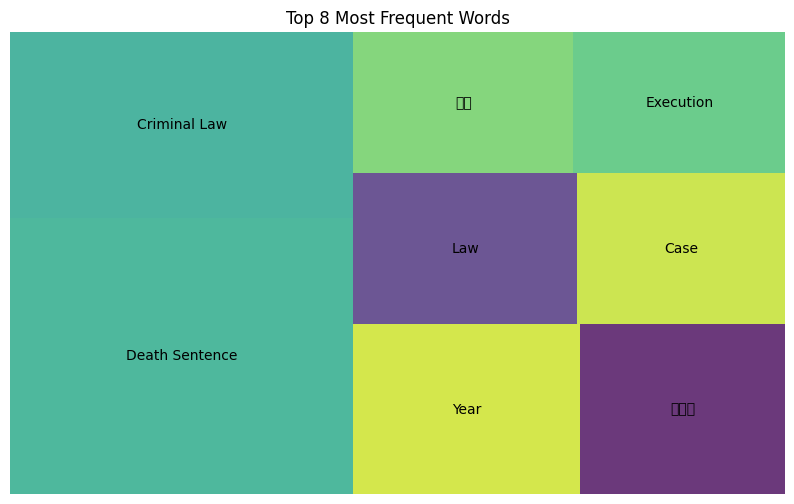

In [6]:
import matplotlib.pyplot as plt
import squarify

# Translation dictionary
translation_dict = {
    '死刑': 'Death Sentence',
    '刑法': 'Criminal Law',
    '年': 'Year',
    '案件': 'Case',
    '司法': 'Judicial',
    '问题': 'Problems',
    '法律': 'Law',
    '执行': 'Execution'
}

# Get the top 10 most frequent words and their frequencies
top_10_words = [translation_dict.get(word, word) for word, _ in word_frequency.most_common(8)]
top_10_freqs = [freq for _, freq in word_frequency.most_common(8)]

# Create a treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_10_freqs, label=top_10_words, alpha=0.8)
plt.axis('off')
plt.title('Top 8 Most Frequent Words')
plt.show()


In [7]:
# This is actually not necessary, because it is government files, and the tone should be neutral
# But I am just running it for fun, and it turn out that pre-trained RoBERTa is kind of alright
# but still, it needs refining.

import torch
import numpy as np
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pandas as pd
from torch.nn.functional import softmax
import time

# Set random seed for reproducibility
seed = 59

torch.manual_seed(seed)
np.random.seed(seed)

# Load the pre-trained RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Load the pre-trained RoBERTa model for sequence classification
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)  # Assuming 3 labels: positive, negative, neutral

# Load your tokenized text data
file_path = file_path  # Make sure 'file_path' is defined somewhere in your code
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to perform sentiment analysis using RoBERTa
def roberta_sentiment_analysis(text):
    # Tokenize the text and convert it into input IDs
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding='max_length', return_tensors='pt')

    # Perform forward pass to get logits
    with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits

    # Apply softmax to convert logits to probabilities
    probabilities = softmax(logits, dim=1).squeeze().tolist()
    
    # Determine the sentiment label based on the highest probability
    sentiment_label = ['Positive', 'Negative', 'Neutral'][probabilities.index(max(probabilities))]
    
    return probabilities, sentiment_label

# Measure the start time
start_time = time.time()

# Apply sentiment analysis function to the tokenized content
df['sentiment_probs'], df['sentiment_label'] = zip(*df['内容'].apply(roberta_sentiment_analysis))

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = (end_time - start_time) / 60
print(f"Time elapsed: {elapsed_time} minutes")
print(f"一共用时:{elapsed_time}分钟")

# Display the DataFrame with sentiment probabilities and labels
print(df[['tokenized_content', 'sentiment_probs', 'sentiment_label']].head())

# Write the DataFrame to the original CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print("DataFrame with tokenized content after sentiment analysis has been saved to the original file:", file_path)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Time elapsed: 0.21214367945988974 minutes
一共用时:0.21214367945988974分钟
                                   tokenized_content  \
0  ['35', '年', '马拉松', '诉讼', '终划', '句号', '无罪', '20...   
1  ['百香果', '女孩', '被害案', '死刑', '复核', '裁定书', '亮点', ...   
2  ['牧人', '屠夫', '影评', '死刑', '存废', '注定', '无法', '达成...   
3  ['礼记', '血亲', '复仇', '理念', '古代', '法制', '影响', '20...   
4  ['何泽华', '一审', '被判', '死缓', '2024', '05', '29', ...   

                                     sentiment_probs sentiment_label  
0  [0.3275858461856842, 0.33561205863952637, 0.33...         Neutral  
1  [0.3299337327480316, 0.3356090784072876, 0.334...        Negative  
2  [0.33091405034065247, 0.3345973491668701, 0.33...        Negative  
3  [0.3298585116863251, 0.3377218544483185, 0.332...        Negative  
4  [0.3304586410522461, 0.33692362904548645, 0.33...        Negative  
DataFrame with tokenized content after sentiment analysis has been saved to the original file: C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sent

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Join all the items in 'tokenized_content' together as a list of strings
tokenized_docs = df['tokenized_content'].apply(lambda x: ' '.join(x)).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,',",",0,1,2,3,4,5,6,...,项,顺,须,题,风,食,饭,首,驳,高
0,16635,4640,2319,40,46,37,13,4,14,4,...,1,1,0,4,1,1,2,0,2,16
1,9393,2590,1294,4,4,6,0,1,2,0,...,0,1,3,17,1,0,0,10,0,15
2,3654,1032,515,5,7,2,1,1,1,0,...,0,0,0,5,0,0,1,0,1,0
3,5035,1426,712,6,3,4,1,4,1,1,...,0,0,3,0,1,0,0,0,1,2
4,2457,674,336,6,4,11,3,5,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

# Define a function to preprocess and join tokenized content
def preprocess_and_join(tokens):
    # Join tokens into a single string
    joined_str = ' '.join(tokens)
    # Remove unwanted characters using regular expression
    cleaned_str = re.sub(r'[\[\],\'\s]+', '', joined_str)
    return cleaned_str

# Apply preprocessing and join tokenized content, then convert to list
tokenized_docs = df['tokenized_content'].apply(preprocess_and_join).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,17,2023,2024,一名,一定,一审,一审判决,一案,一点,一直,...,道德,部分,重大,重要,量刑,问题,限制,需要,非常,非法
0,0,1,0,4,2,0,1,2,1,3,...,0,1,0,0,0,3,1,1,1,0
1,0,0,0,1,3,1,0,0,0,0,...,0,2,0,3,0,15,0,1,1,0
2,1,0,0,2,1,0,0,0,0,1,...,1,0,0,0,0,4,0,1,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,2,0,0,2,0,0,1
4,0,1,0,0,0,2,0,1,0,0,...,0,2,0,0,0,0,0,0,0,2


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Compute TF-IDF scores for the DTM
tfidf_matrix = tfidf_transformer.fit_transform(dtm)

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (optional)
print(tfidf_df.head())


         17      2023  2024        一名        一定        一审      一审判决        一案  \
0  0.000000  0.019533   0.0  0.082262  0.041131  0.000000  0.024539  0.046056   
1  0.000000  0.000000   0.0  0.019710  0.059131  0.022071  0.000000  0.000000   
2  0.066734  0.000000   0.0  0.119194  0.059597  0.000000  0.000000  0.000000   
3  0.000000  0.000000   0.0  0.000000  0.096686  0.000000  0.000000  0.000000   
4  0.000000  0.063534   0.0  0.000000  0.000000  0.149805  0.000000  0.074903   

         一点        一直  ...        道德        部分   重大        重要   量刑        问题  \
0  0.024539  0.065159  ...  0.000000  0.020565  0.0  0.000000  0.0  0.050886   
1  0.000000  0.000000  ...  0.000000  0.039421  0.0  0.053477  0.0  0.243849   
2  0.000000  0.062942  ...  0.071112  0.000000  0.0  0.000000  0.0  0.196618   
3  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.087441  0.0  0.000000   
4  0.000000  0.000000  ...  0.000000  0.133784  0.0  0.000000  0.0  0.000000   

         限制        需要        非常 

In [11]:
# Compute document-level TF-IDF scores by summing TF-IDF scores for each term within each document
document_tfidf_scores = tfidf_matrix.sum(axis=1)

# Convert the document-level TF-IDF scores to a DataFrame for better visualization
document_tfidf_df = pd.DataFrame(document_tfidf_scores, columns=["TF-IDF Score"])

# Add a column to the DataFrame to indicate the document index or ID
document_tfidf_df["Document Index"] = df.index

# Display the document-level TF-IDF scores
print(document_tfidf_df.head())


   TF-IDF Score  Document Index
0      9.202075               0
1      9.221697               1
2      7.012054               2
3      7.655863               3
4      7.115650               4


In [12]:
# Identify the top N important terms in each document based on TF-IDF scores
top_n_terms_per_document = 5  # Change this value as needed
top_terms_per_document = []

for document_index in range(len(df)):
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[document_index].toarray()[0]
    # Get the indices of the top N terms based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-top_n_terms_per_document:][::-1]
    # Get the actual terms from the CountVectorizer
    top_terms = [count_vectorizer.get_feature_names_out()[index] for index in top_term_indices]
    # Append the top terms to the list
    top_terms_per_document.append(top_terms)

# Add the top terms to the DataFrame
document_tfidf_df["Top Terms"] = top_terms_per_document

# Display the DataFrame with document-level TF-IDF scores and top terms
print(document_tfidf_df.head())

   TF-IDF Score  Document Index             Top Terms
0      9.202075               0   [年, 证据, 父亲, 时, 被害人]
1      9.221697               1  [死刑, 政策, 法律, 问题, 案件]
2      7.012054               2   [死刑, 成为, 会, 问题, 行刑]
3      7.655863               3   [杀害, 古代, 杀, 儿子, 意思]
4      7.115650               4  [依法, 执行, 终身, 特别, 情节]


In [13]:
# Concatenate document_tfidf_df with df along the columns axis
df = pd.concat([df, document_tfidf_df], axis=1)

# Save the concatenated DataFrame to the specified file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Document-Level TF-IDF Scores and Top Terms have been saved to the original file:", file_path)

# Define file paths for saving
dtm_df_file_path = r'C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sentence\CSV\Government\gov_death_sentence_dtm_df.csv'
tfidf_df_file_path = r'C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sentence\CSV\Government\gov_death_stentence_tfidf_df.csv'

# Save DataFrames to CSV files
dtm_df.to_csv(dtm_df_file_path, index=False, encoding='utf-8-sig')
tfidf_df.to_csv(tfidf_df_file_path, index=False, encoding='utf-8-sig')

print("Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.")


Document-Level TF-IDF Scores and Top Terms have been saved to the original file: C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sentence\CSV\Government\Gov_Death_Sentence.csv
Document-Term Matrix DataFrame and TF-IDF DataFrame have been saved to their respective directories.


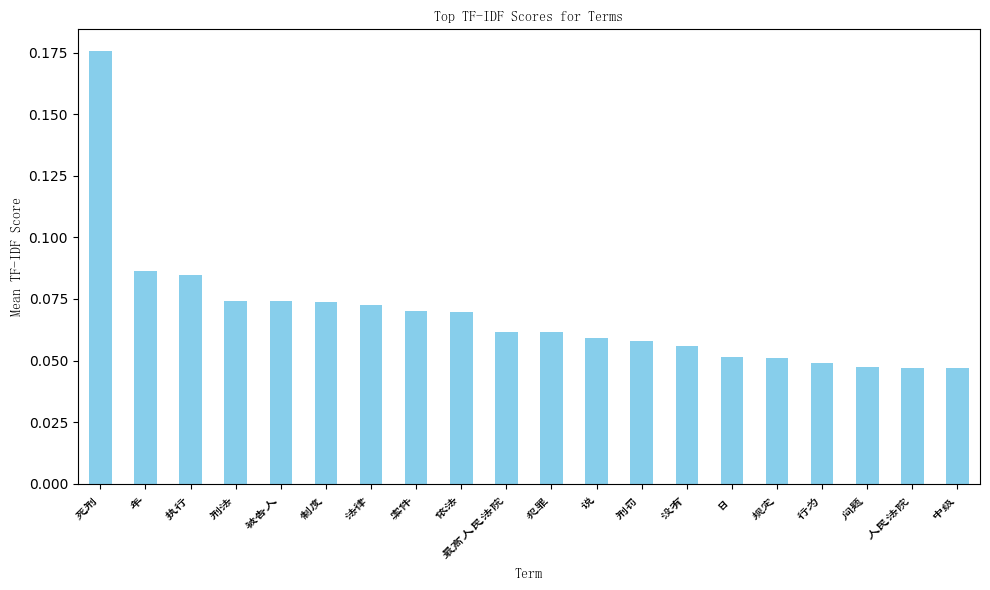

In [14]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Calculate mean TF-IDF scores for each term across all documents
mean_tfidf_scores = tfidf_df.mean(axis=0)

# Sort terms based on mean TF-IDF scores in descending order
sorted_terms = mean_tfidf_scores.sort_values(ascending=False)

# Select top N terms to visualize
top_n = 20  # You can adjust this value as needed
top_terms = sorted_terms[:top_n]

# Specify the path to the SimFang font file
font_path =  r'C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Fonts\SIMLI.TTF'

# Register the SimFang font with Matplotlib
custom_font = FontProperties(fname=font_path)

# Plot bar chart with custom font
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top TF-IDF Scores for Terms', fontproperties=custom_font)
plt.xlabel('Term', fontproperties=custom_font)
plt.ylabel('Mean TF-IDF Score', fontproperties=custom_font)
plt.xticks(rotation=45, ha='right', fontproperties=custom_font)
plt.tight_layout()
plt.show()

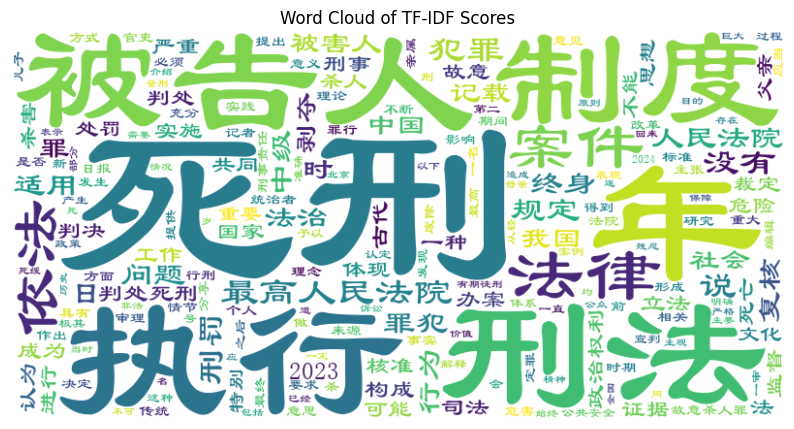

In [15]:
from wordcloud import WordCloud

# Generate word cloud with custom font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(mean_tfidf_scores)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of TF-IDF Scores')
plt.axis('off')
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify


# Extracting top terms from the dataframe
top_terms = df['Top Terms'].explode()

# Counting the frequency of each term
term_frequencies = top_terms.value_counts().head(9)

# Create a dictionary to store the top five most frequent terms and their frequencies
top_terms_dict = dict(zip(term_frequencies.index.tolist(), term_frequencies.values.tolist()))

# Print the top five most frequent terms and their frequencies
for term, frequency in top_terms_dict.items():
    print(f"Term: {term}, Frequency: {frequency}")

# Extract terms and frequencies from the dictionary
terms = list(top_terms_dict.keys())
frequencies = list(top_terms_dict.values())


Term: 死刑, Frequency: 9
Term: 最高人民法院, Frequency: 4
Term: 案件, Frequency: 4
Term: 被告人, Frequency: 4
Term: 制度, Frequency: 4
Term: 法, Frequency: 3
Term: 执行, Frequency: 3
Term: 依法, Frequency: 3
Term: 年, Frequency: 3


C:\Users\jesse\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


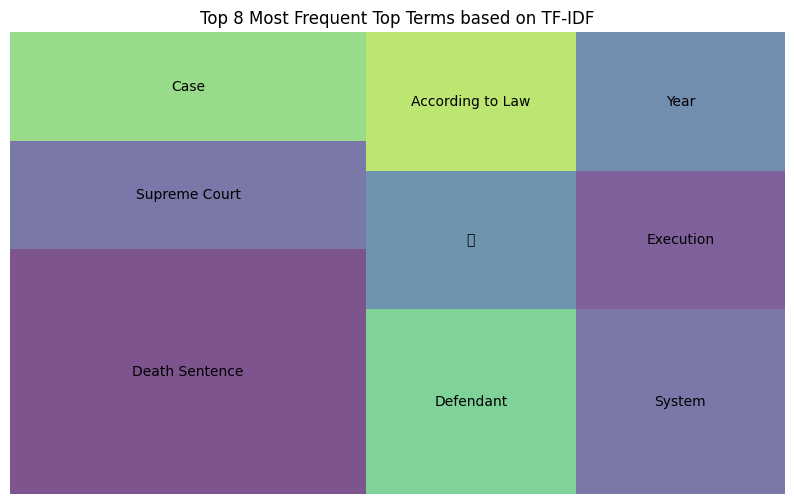

In [17]:
# Mapping dictionary to translate Chinese terms to English
translation_dict = {
    '死刑': 'Death Sentence',
    '案件': 'Case',
    '被告人': 'Defendant',
    '制度': 'System',
    '最高人民法院': 'Supreme Court',
    '罪犯': 'Criminal',
    '执行': 'Execution',
    '依法': 'According to Law',
    '年': 'Year'
}

# Translate the labels using the mapping dictionary
translated_terms = [translation_dict.get(term, term) for term in terms]

# Plotting the treemap with translated labels
plt.figure(figsize=(10, 6))
squarify.plot(sizes=frequencies, label=translated_terms, alpha=0.7)
plt.title('Top 8 Most Frequent Top Terms based on TF-IDF')
plt.axis('off')
plt.show()


In [18]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model to the DTM
lda_output = lda_model.fit_transform(dtm)

# Display the shape of the LDA output
print("Shape of LDA output:", lda_output.shape)

# Display the LDA model
print(lda_model)


Shape of LDA output: (26, 5)
LatentDirichletAllocation(n_components=5, random_state=42)


In [19]:
# Define the column names for topic probabilities
topic_columns = ['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']

# Create a DataFrame to store the document-level topic probabilities
topic_prob_df = pd.DataFrame(lda_output, columns=topic_columns)

# Combine the topic probabilities DataFrame with the original DataFrame df
df = pd.concat([df, topic_prob_df], axis=1)

# Write the combined DataFrame to a CSV file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with document-level topic probabilities has been saved")


DataFrame with document-level topic probabilities has been saved


In [20]:
from gensim import matutils
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Reverse the mapping from count_vectorizer vocabulary
id2word = {index: word for word, index in count_vectorizer.vocabulary_.items()}

# Create a corpus-like structure from CountVectorizer vocabulary
corpus_list = [[(index, 1)] for index in range(len(count_vectorizer.vocabulary_))]

# Convert Python dictionary to gensim Dictionary
gensim_dictionary = Dictionary.from_corpus(corpus_list, id2word=id2word)

# Convert scikit-learn DTM to gensim corpus
corpus = matutils.Sparse2Corpus(dtm.T)

# Convert scikit-learn LDA model to gensim-compatible format
num_topics = lda_model.n_components
lda_model_gensim = LdaModel(
    corpus=corpus,
    id2word=gensim_dictionary,
    num_topics=num_topics
)

# Visualize the LDA model using pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim.prepare(lda_model_gensim, corpus, gensim_dictionary)

# If you display it here, the button icons (save, insert cells, copy and run and etc up top) would be gone
# Don't know why............
# pyLDAvis.display(vis_data)

# Due to the random initialization of parameters and the stochastic nature of the algorithm, the visualization is slightly different each run.
# Later I will experiment with different values for hyperparameters 
# such as the number of topics, alpha, and beta to find the configuration 
# that yields stable and interpretable results.

In [21]:
from pyLDAvis import save_html

output_directory = r'C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sentence\CSV\Government\Gov_Death_Stentence_lda_visualization.html'

# Save the visualization to an HTML file
pyLDAvis.save_html(vis_data, output_directory)
print("Visualized content has been saved to: ", output_directory)


Visualized content has been saved to:  C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sentence\CSV\Government\Gov_Death_Stentence_lda_visualization.html


In [22]:
import webbrowser

# Open the HTML file in the default web browser
webbrowser.open_new_tab(output_directory)


True

In [23]:
import pandas as pd

# # Load the DataFrame
# df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to determine the topic(s) with the highest probability for each narrative
def get_max_topic(row):
    # Extract topic probabilities from the row
    topic_probs = row[['topic_prob1', 'topic_prob2', 'topic_prob3', 'topic_prob4', 'topic_prob5']]
    # Convert topic probabilities to float
    topic_probs = [float(prob) for prob in topic_probs]
    # Find the index of the topic with the highest probability
    max_topic_index = topic_probs.index(max(topic_probs))
    # Return the index of the topic with the highest probability
    return max_topic_index + 1  # Adding 1 to make the index 1-based

# Apply the function to each row to determine the topic(s) with the highest probability for each narrative
df['max_topic'] = df.apply(get_max_topic, axis=1)

# Append the newly generated columns to the original file
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("Newly generated columns and data have been appended to the original file:", file_path)

Newly generated columns and data have been appended to the original file: C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sentence\CSV\Government\Gov_Death_Sentence.csv


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


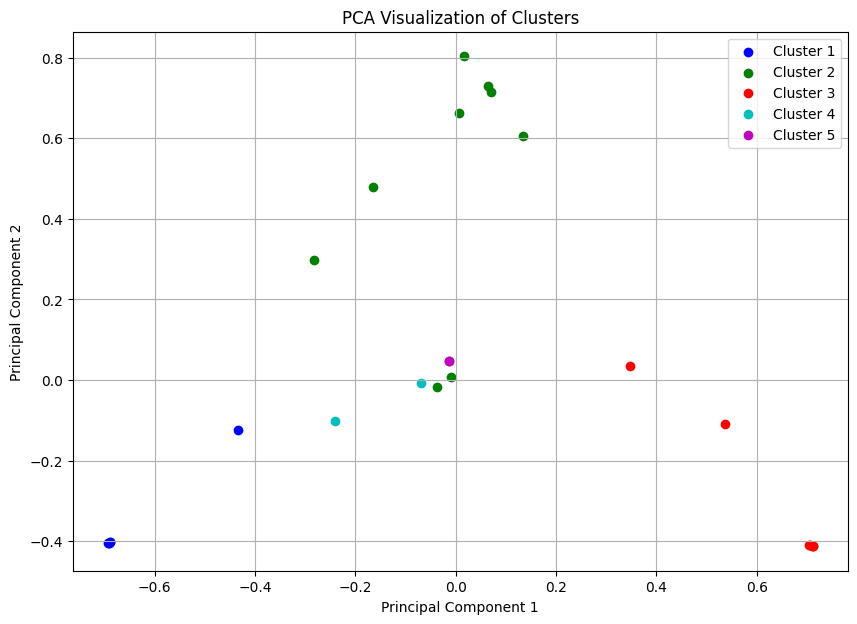

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming lda_model is your trained LDA model and dtm is your document-term matrix
# Get dominant topic probabilities for each document
dominant_topics = [np.argmax(prob) for prob in lda_model.transform(dtm)]

# Assuming num_clusters is the number of clusters you want
num_clusters = 5  # You can adjust this value based on your dataset and requirements

# Perform K-means clustering based on dominant topic probabilities
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(lda_output)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(lda_output)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Define colors for each cluster
colors = ['b', 'g', 'r', 'c', 'm']

for cluster_label, color in zip(range(num_clusters), colors):
    cluster_indices = np.where(clusters == cluster_label)[0]
    plt.scatter(pca_result[cluster_indices, 0], pca_result[cluster_indices, 1], c=color, label=f'Cluster {cluster_label + 1}')

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Add cluster labels to the DataFrame
df['cluster_label'] = clusters

# Now you can save the DataFrame to a CSV file
file_path = file_path
df.to_csv(file_path, index=False, encoding='utf-8-sig')

print("DataFrame with cluster labels has been saved to:", file_path)

DataFrame with cluster labels has been saved to: C:\Users\jesse\VSCodeProjects\Master_Thesis\CN_Spectrum\Topics\Death_Sentence\CSV\Government\Gov_Death_Sentence.csv


In [26]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Filter data by cluster_label
clusters = df['cluster_label'].unique()
top_keywords_per_cluster = {}
top_terms_per_cluster = {}

# Step 2-4: Calculate top terms for each cluster
for cluster in clusters:
    # Filter data by cluster_label
    cluster_data = df[df['cluster_label'] == cluster]
    
    # Concatenate tokenized content for the cluster
    cluster_corpus = ' '.join(cluster_data['tokenized_content'])
    
    # Calculate TF-IDF scores for the cluster corpus
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([cluster_corpus])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]
    
    # Get the top terms for the cluster based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-10:][::-1]  # Get indices of top 10 terms
    top_terms = [feature_names[idx] for idx in top_term_indices]
    
    # Store top terms for the cluster
    top_terms_per_cluster[cluster] = top_terms
    
    # Flatten the list of lists of terms
    keywords = [term for sublist in cluster_data["Top Terms"] for term in sublist]
    
    # Find the top 10 most frequent keywords for each cluster
    keyword_counter = Counter(keywords)
    top_keywords = keyword_counter.most_common(10)  # Get the top 10 most common keywords
    top_keywords_per_cluster[cluster] = [keyword[0] for keyword in top_keywords]  # Extract the keyword from (keyword, count) tuple

# Sort the dictionaries by cluster label
sorted_top_keywords_per_cluster = dict(sorted(top_keywords_per_cluster.items()))
sorted_top_terms_per_cluster = dict(sorted(top_terms_per_cluster.items()))

# Print the top 10 keywords for each cluster
print("Ten Most Frequent Words for Each Cluster")
for cluster, keywords in sorted_top_keywords_per_cluster.items():
    print(f"Cluster {cluster + 1} Most Frequent Words: {' '.join(keywords)}")

# Print top 10 terms for each cluster
print("\nTen Top Terms for Each Cluster")
for cluster, terms in sorted_top_terms_per_cluster.items():
    print(f"Cluster {cluster + 1} top terms: {' '.join(terms)}")


Ten Most Frequent Words for Each Cluster
Cluster 1 Most Frequent Words: 说 记载 刑罚 制度 杀害 古代 杀 儿子 意思 罪犯
Cluster 2 Most Frequent Words: 死刑 问题 案件 犯罪 办案 年 证据 父亲 时 被害人
Cluster 3 Most Frequent Words: 被告人 依法 最高人民法院 执行 年 日 被害人 死刑 终身 特别
Cluster 4 Most Frequent Words: 死刑 制度 案件 统治者 执行 复核
Cluster 5 Most Frequent Words: 刑法 立法 法律 我国 法 理论 行为 研究 提出

Ten Top Terms for Each Cluster
Cluster 1 top terms: 法律 刑罚 制度 复仇 庶人 五刑 录囚 天道 体现 没有
Cluster 2 top terms: 死刑 周永刚 犯罪 案件 法律 问题 执行 没有 证据 适用
Cluster 3 top terms: 被告人 死刑 依法 周某 执行 劳荣枝 最高人民法院 终身 中级 被害人
Cluster 4 top terms: 死刑 案件 制度 皇帝 复核 复奏 执行 统治者 死罪 进行
Cluster 5 top terms: 刑法 人格 教授 张文 犯罪人 立法 理论 行为 刑法学 研究
